<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-4.2.2:-Regularisation" data-toc-modified-id="Lab-4.2.2:-Regularisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab 4.2.2: Regularisation</a></span><ul class="toc-item"><li><span><a href="#1.-Regularisation" data-toc-modified-id="1.-Regularisation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Regularisation</a></span><ul class="toc-item"><li><span><a href="#1.1-Load-Diabetics-Data-Using-datasets-of-sklearn" data-toc-modified-id="1.1-Load-Diabetics-Data-Using-datasets-of-sklearn-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1 Load Diabetics Data Using datasets of sklearn</a></span></li><li><span><a href="#1.2-Create-a-Base-Model-Using-Linear-Regression" data-toc-modified-id="1.2-Create-a-Base-Model-Using-Linear-Regression-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1.2 Create a Base Model Using Linear Regression</a></span></li><li><span><a href="#1.3-Ridge" data-toc-modified-id="1.3-Ridge-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>1.3 Ridge</a></span><ul class="toc-item"><li><span><a href="#1.3.1-Calculate-Ridge-Regression-model" data-toc-modified-id="1.3.1-Calculate-Ridge-Regression-model-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>1.3.1 Calculate Ridge Regression model</a></span></li><li><span><a href="#1.3.2-Visual-Represenantion-of-Coefficient-of-Ridge-Model" data-toc-modified-id="1.3.2-Visual-Represenantion-of-Coefficient-of-Ridge-Model-1.1.3.2"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>1.3.2 Visual Represenantion of Coefficient of Ridge Model</a></span></li><li><span><a href="#1.3.3.-[BONUS]--Find-an-optimal-value-for-Ridge-regression-alpha-using-RidgeCV." data-toc-modified-id="1.3.3.-[BONUS]--Find-an-optimal-value-for-Ridge-regression-alpha-using-RidgeCV.-1.1.3.3"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using <code>RidgeCV</code>.</a></span></li></ul></li><li><span><a href="#1.4-Lasso" data-toc-modified-id="1.4-Lasso-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>1.4 Lasso</a></span><ul class="toc-item"><li><span><a href="#1.4.1-Calculate-Lasso-Regression-model" data-toc-modified-id="1.4.1-Calculate-Lasso-Regression-model-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>1.4.1 Calculate Lasso Regression model</a></span></li><li><span><a href="#1.4.2-Visual-Represenantion-of-Coefficient-of-Lasso-Model" data-toc-modified-id="1.4.2-Visual-Represenantion-of-Coefficient-of-Lasso-Model-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>1.4.2 Visual Represenantion of Coefficient of Lasso Model</a></span></li><li><span><a href="#1.4.3.-[BONUS]--Find-an-optimal-value-for-Loass-regression-alpha-using-LassoCV." data-toc-modified-id="1.4.3.-[BONUS]--Find-an-optimal-value-for-Loass-regression-alpha-using-LassoCV.-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>1.4.3. [BONUS]  Find an optimal value for Loass regression alpha using <code>LassoCV</code>.</a></span></li></ul></li></ul></li><li><span><a href="#2.-[Bonus]-Compare-the-residuals-for-the-Ridge-and-Lasso-visually." data-toc-modified-id="2.-[Bonus]-Compare-the-residuals-for-the-Ridge-and-Lasso-visually.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. [Bonus] Compare the residuals for the Ridge and Lasso visually.</a></span></li></ul></li></ul></div>

![alt text](https://i.imgur.com/1WaY7aA.png)

# Black Cat Data - Data Science and AI
## Lab 4.2.2: Regularisation

In [2]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [3]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn

diabetes = datasets.load_diabetes()

In [4]:
# Description
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [5]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [6]:
# Target
y = diabetes.target

#### 1.2 Create a Base Model Using Linear Regression

In [7]:
# Create Model

linreg = LinearRegression()

In [8]:
# Fit

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Score
linreg.score(X, y)

0.5177494254132934

In [10]:
# Check Coeffiricent

linreg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [11]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

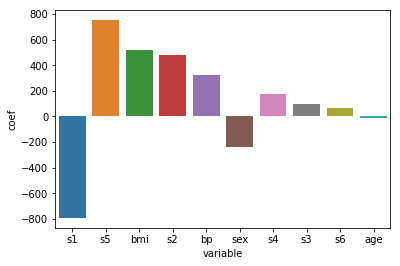

In [13]:
# Plot Coefficients
view_coeff(X, linreg)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [21]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
ridge_coefs = []
ridge_errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    ridge_coefs.append(clf.coef_)
    ridge_errors.append(mean_squared_error(clf.coef_, linreg.coef_))

##### 1.3.2 Visual Represenantion of Coefficient of Ridge Model

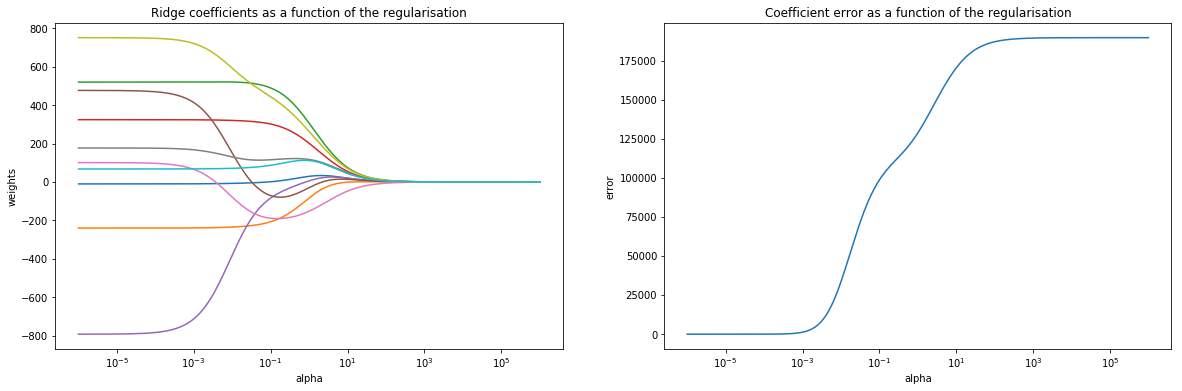

In [20]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, ridge_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [17]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138362231730856


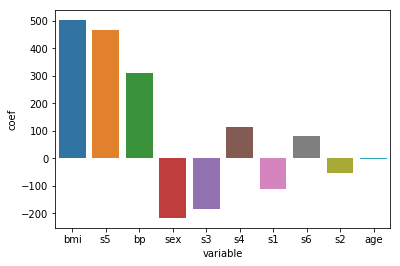

In [18]:
view_coeff(X, optimal_ridge)

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [23]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters

lasso = Lasso()

# keep track of the intermediate results for coefficients and errors
lasso_coefs = []
lasso_errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)
    lasso_errors.append(mean_squared_error(lasso.coef_, linreg.coef_))

##### 1.4.2 Visual Represenantion of Coefficient of Lasso Model

Hint: Same as Ridge

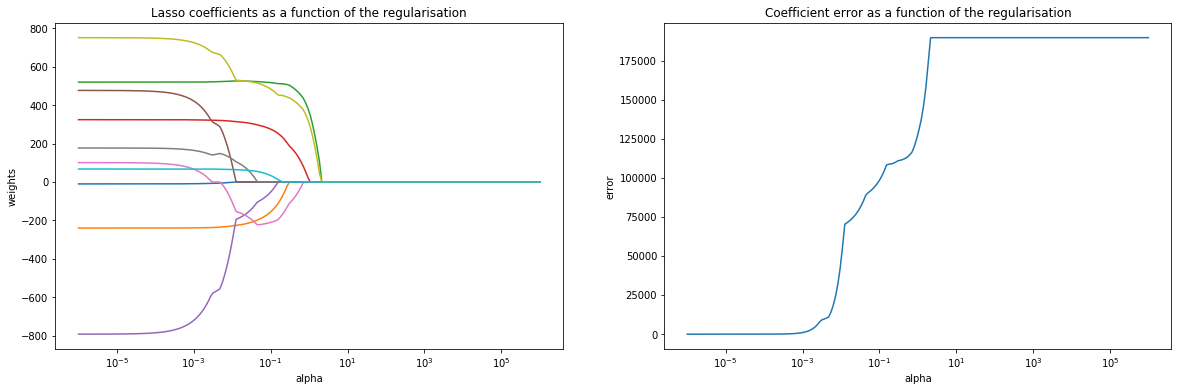

In [24]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, lasso_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.3. [BONUS]  Find an optimal value for Loass regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [25]:
# Find Optimal Lasso Using LassoCV

optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.05805225516094896
Score: 0.512648775957248


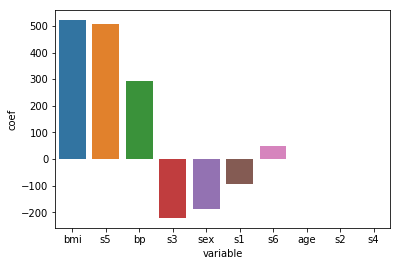

In [26]:
# Plot Coefficient

view_coeff(X, optimal_lasso)

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [54]:
def find_model_residuals(model, X, y):
    
    model.fit(X, y)
    
    # Find residuals
    preds = model.predict(X)
    residuals = y - preds
    
    return residuals

In [55]:
# Build the ridge and lasso using optimal alpha

ridge_model = Ridge(alpha=optimal_ridge.alpha_)
lasso_model = Lasso(alpha=optimal_lasso.alpha_)

# find residuals

ridge_residuals = find_model_residuals(ridge_model, X, y)
lasso_residuals = find_model_residuals(lasso_model, X, y)

In [57]:
# Create df of residuals and target

residuals_df = pd.DataFrame({'Target': y,
                             'Ridge residuals': ridge_residuals,
                             'Lasso residuals': lasso_residuals})

residuals_df.head()

,Target,Ridge residuals,Lasso residuals
0,151.0,-50.122296,-53.016627
1,75.0,2.659083,3.909741
2,141.0,-32.398510,-34.614324
3,206.0,43.626430,44.343667
4,135.0,6.546879,7.773560


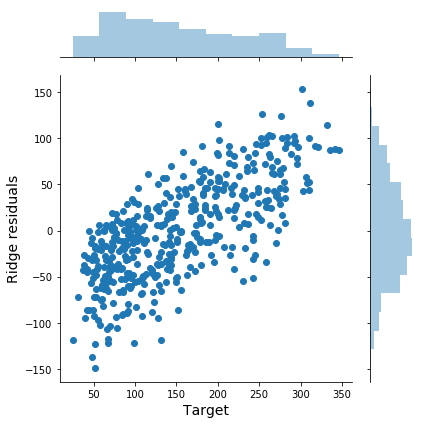

In [51]:
# Jointplot

j = sns.jointplot(residuals_df['Target'], ridge_residuals)
j.set_axis_labels('Target', 'Ridge residuals', fontsize=14)

plt.tight_layout()
plt.show()

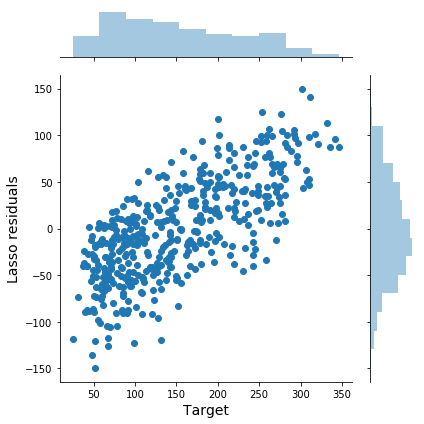

In [52]:
# Jointplot

j = sns.jointplot(y, lasso_residuals)
j.set_axis_labels('Target', 'Lasso residuals', fontsize=14)

plt.tight_layout()
plt.show()

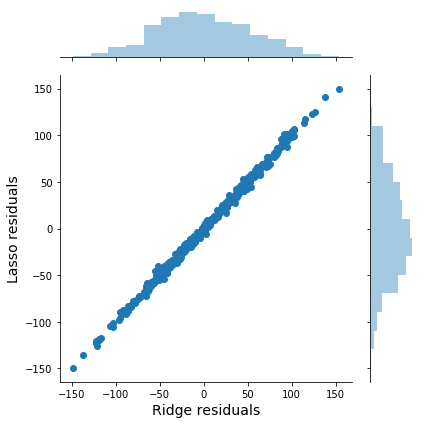

In [53]:
# Jointplot

j = sns.jointplot(ridge_residuals, lasso_residuals)
j.set_axis_labels('Ridge residuals', 'Lasso residuals', fontsize=14)

plt.tight_layout()
plt.show()